In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# from zipfile import ZipFile
# file_name = 'archive.zip'
# with ZipFile(file_name,'r') as zip:
#   zip.extractall()
#   print("Done..")

## Libraries

In [2]:
import cv2
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models

## Preprocessing(Training Data)

In [3]:
d = os.path.join("../../Training_Data(80)/train")
classes = ['Glass', 'Metal', 'Paper', 'Plastic', 'Trash']

In [4]:
os.getcwd()

'E:\\New Data\\Code\\test'

In [5]:
for label in classes:
    directory = os.path.join(d, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "Glass":	 1448
Images of label "Metal":	 1485
Images of label "Paper":	 1491
Images of label "Plastic":	 1421
Images of label "Trash":	 1766


In [6]:
data=[]
for c in classes:
    i=classes.index(c)
    path=os.path.join(d,c)
    for img in os.listdir(path):
        im=cv2.imread(os.path.join(path,img))
        im=cv2.resize(im,(224,224))
        data.append([im,i])

In [7]:
X=[]
Y=[]
for x,y in data:
    X.append(x)
    Y.append(y)

In [8]:
x_train=np.array(X)
y_train=np.array(Y)
print(x_train.shape,y_train.shape)

(7611, 224, 224, 3) (7611,)


## Preprocessing(Testing Data)

In [9]:
d = os.path.join("../../Training_Data(80)/val")

In [10]:
for label in classes:
    directory = os.path.join(d, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "Glass":	 371
Images of label "Metal":	 371
Images of label "Paper":	 373
Images of label "Plastic":	 357
Images of label "Trash":	 441


In [11]:
data=[]
for c in classes:
    i=classes.index(c)
    path=os.path.join(d,c)
    for img in os.listdir(path):
        im=cv2.imread(os.path.join(path,img))
        im=cv2.resize(im,(224,224))
        data.append([im,i])

In [12]:
X=[]
Y=[]
for x,y in data:
    X.append(x)
    Y.append(y)

In [13]:
x_test=np.array(X)
y_test=np.array(Y)
print(x_test.shape,y_test.shape)

(1913, 224, 224, 3) (1913,)


In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(7611, 224, 224, 3) (7611,)
(1913, 224, 224, 3) (1913,)


## Build Model

In [15]:
model_denseNet169=tf.keras.applications.densenet.DenseNet169(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [16]:
model_denseNet169.summary()

Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 56, 56, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 56, 56, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 56, 56, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 conv3_block2_0_relu (Activatio  (None, 28, 28, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 28, 28, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 28, 28, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 28, 28, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization) 

 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 28, 28, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 28, 28, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 28, 28, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_blo

 conv4_block2_concat (Concatena  (None, 14, 14, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 14, 14, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 14, 14, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 14, 14, 128)  40960       ['conv4_block3_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 14, 14, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 14, 14, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block11_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 14, 14, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 14, 14, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 14, 14, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 14, 14, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 14, 14, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block16_1_conv[0][0]']   
 lization)

 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 14, 14, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 conv4_block25_0_bn (BatchNorma  (None, 14, 14, 1024  4096       ['conv4_block24_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block25_0_relu (Activati  (None, 14, 14, 1024  0          ['conv4_block25_0_bn[0][0]']     
 on)      

 lization)                      )                                                                 
                                                                                                  
 conv4_block29_0_relu (Activati  (None, 14, 14, 1152  0          ['conv4_block29_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_block29_1_conv (Conv2D)  (None, 14, 14, 128)  147456      ['conv4_block29_0_relu[0][0]']   
                                                                                                  
 conv4_block29_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block29_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 pool4_pool (AveragePooling2D)  (None, 7, 7, 640)    0           ['pool4_conv[0][0]']             
                                                                                                  
 conv5_block1_0_bn (BatchNormal  (None, 7, 7, 640)   2560        ['pool4_pool[0][0]']             
 ization)                                                                                         
                                                                                                  
 conv5_block1_0_relu (Activatio  (None, 7, 7, 640)   0           ['conv5_block1_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block1_1_conv (Conv2D)   (None, 7, 7, 128)    81920       ['conv5_block1_0_relu[0][0]']    
                                                                                                  
 conv5_blo

                                                                                                  
 conv5_block5_1_conv (Conv2D)   (None, 7, 7, 128)    98304       ['conv5_block5_0_relu[0][0]']    
                                                                                                  
 conv5_block5_1_bn (BatchNormal  (None, 7, 7, 128)   512         ['conv5_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block5_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block5_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block5_1_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv5_block9_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block9_1_relu[0][0]']    
                                                                                                  
 conv5_block9_concat (Concatena  (None, 7, 7, 928)   0           ['conv5_block8_concat[0][0]',    
 te)                                                              'conv5_block9_2_conv[0][0]']    
                                                                                                  
 conv5_block10_0_bn (BatchNorma  (None, 7, 7, 928)   3712        ['conv5_block9_concat[0][0]']    
 lization)                                                                                        
                                                                                                  
 conv5_blo

 conv5_block14_0_bn (BatchNorma  (None, 7, 7, 1056)  4224        ['conv5_block13_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block14_0_relu (Activati  (None, 7, 7, 1056)  0           ['conv5_block14_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block14_1_conv (Conv2D)  (None, 7, 7, 128)    135168      ['conv5_block14_0_relu[0][0]']   
                                                                                                  
 conv5_block14_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block14_1_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv5_block18_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block18_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block18_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block18_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block18_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block18_1_relu[0][0]']   
                                                                                                  
 conv5_block18_concat (Concaten  (None, 7, 7, 1216)  0           ['conv5_block17_concat[0][0]',   
 ate)     

 conv5_block22_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block22_1_relu[0][0]']   
                                                                                                  
 conv5_block22_concat (Concaten  (None, 7, 7, 1344)  0           ['conv5_block21_concat[0][0]',   
 ate)                                                             'conv5_block22_2_conv[0][0]']   
                                                                                                  
 conv5_block23_0_bn (BatchNorma  (None, 7, 7, 1344)  5376        ['conv5_block22_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block23_0_relu (Activati  (None, 7, 7, 1344)  0           ['conv5_block23_0_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv5_block27_0_relu (Activati  (None, 7, 7, 1472)  0           ['conv5_block27_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block27_1_conv (Conv2D)  (None, 7, 7, 128)    188416      ['conv5_block27_0_relu[0][0]']   
                                                                                                  
 conv5_block27_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block27_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block27_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block27_1_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv5_block31_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block31_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block31_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block31_1_relu[0][0]']   
                                                                                                  
 conv5_block31_concat (Concaten  (None, 7, 7, 1632)  0           ['conv5_block30_concat[0][0]',   
 ate)                                                             'conv5_block31_2_conv[0][0]']   
                                                                                                  
 conv5_blo

In [17]:
base_input3=model_denseNet169.layers[0].input
base_output3=model_denseNet169.layers[-2].output

final_output3 = layers.Dense(240)(base_output3)
final_output3 = layers.Activation('relu')(final_output3)
final_output3 = layers.Dense(128)(final_output3)
final_output3 = layers.Activation('relu')(final_output3)
final_output3 = layers.Dense(64)(final_output3)
final_output3 = layers.Activation('relu')(final_output3)
final_output3 = layers.Dense(5, activation='softmax')(final_output3)

In [18]:
new_model_denseNet169 = tf.keras.Model(inputs = base_input3, outputs = final_output3)

In [19]:
new_model_denseNet169.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

## Train Model

In [20]:
result_D=new_model_denseNet169.fit(x_train, y_train, epochs = 20,validation_data=(x_test, y_test))

Epoch 1/20
238/238 [==============================] - 1106s 5s/step - loss: 0.6093 - accuracy: 0.7793 - val_loss: 0.3262 - val_accuracy: 0.8845
Epoch 2/20
238/238 [==============================] - 1132s 5s/step - loss: 0.1678 - accuracy: 0.9428 - val_loss: 0.1948 - val_accuracy: 0.9315
Epoch 3/20
238/238 [==============================] - 1083s 5s/step - loss: 0.0791 - accuracy: 0.9721 - val_loss: 0.1449 - val_accuracy: 0.9472
Epoch 4/20
238/238 [==============================] - 1091s 5s/step - loss: 0.0332 - accuracy: 0.9905 - val_loss: 0.1060 - val_accuracy: 0.9639
Epoch 5/20
238/238 [==============================] - 1110s 5s/step - loss: 0.0375 - accuracy: 0.9873 - val_loss: 0.1342 - val_accuracy: 0.9587
Epoch 6/20
238/238 [==============================] - 1103s 5s/step - loss: 0.0231 - accuracy: 0.9932 - val_loss: 0.1072 - val_accuracy: 0.9618
Epoch 7/20
238/238 [==============================] - 1090s 5s/step - loss: 0.0115 - accuracy: 0.9967 - val_loss: 0.1640 - val_accuracy:

## Accuracy

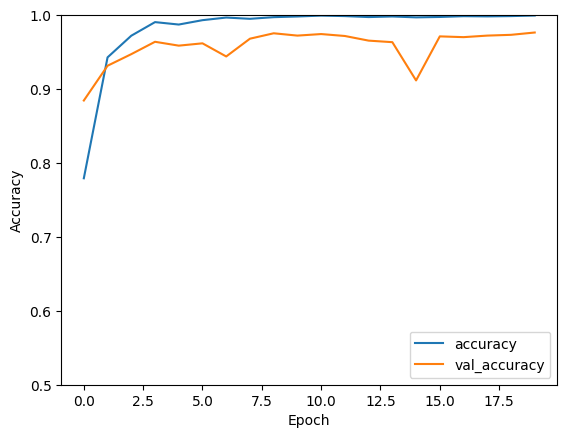

In [21]:
plt.plot(result_D.history['accuracy'], label='accuracy')
plt.plot(result_D.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

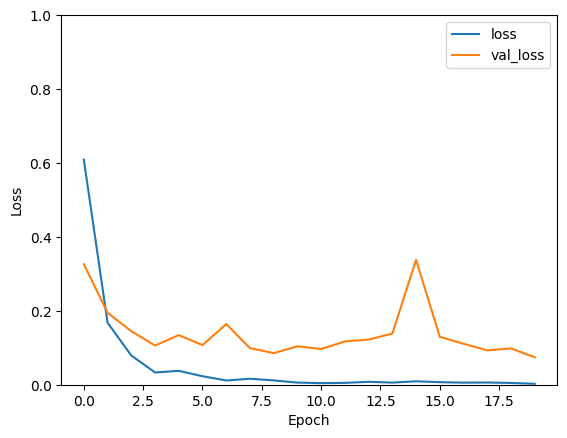

In [22]:
plt.plot(result_D.history['loss'], label='loss')
plt.plot(result_D.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')

In [23]:
loss , accuracy = new_model_denseNet169.evaluate(x_test,y_test)

60/60 [==============================] - 59s 980ms/step - loss: 0.0741 - accuracy: 0.9765


In [24]:
y_pred = new_model_denseNet169.predict(x_test).round(2)

60/60 [==============================] - 62s 1s/step


[[363   4   0   3   1]
 [  4 360   1   2   4]
 [  0   0 368   0   5]
 [  4   3   0 349   1]
 [  2   1   5   5 428]]


<Axes: >

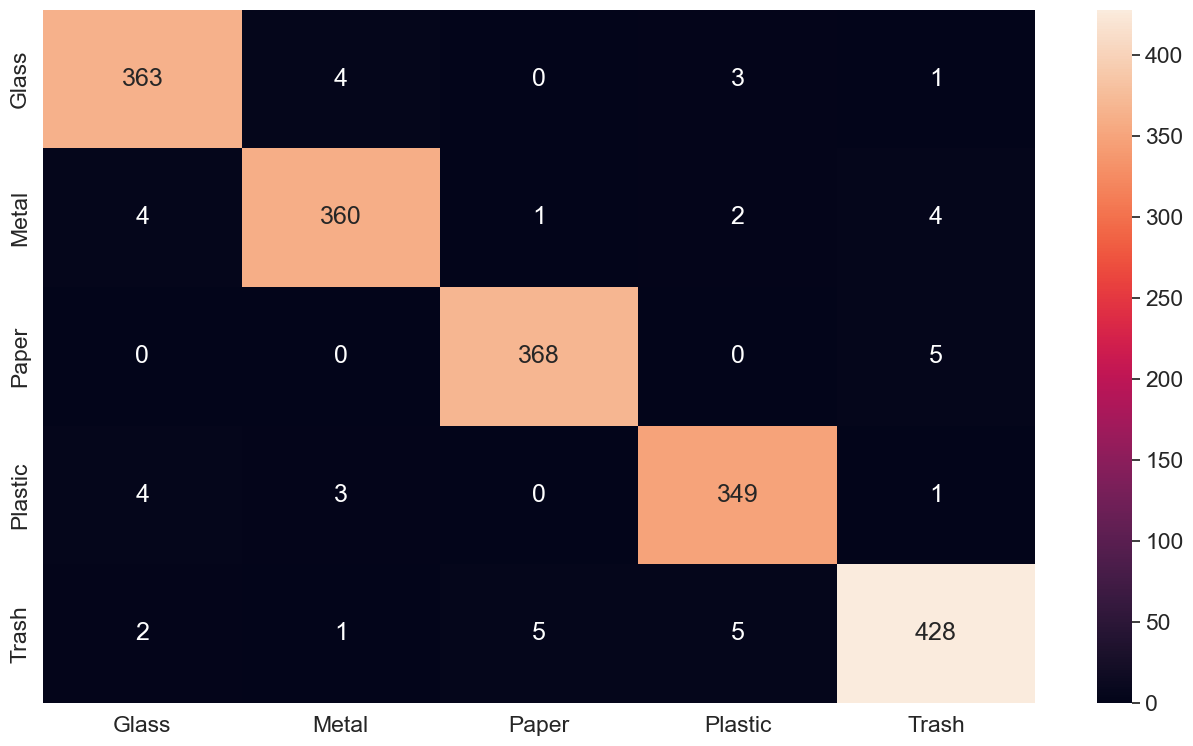

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)
print(cm)

sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)

In [26]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=classes)
print(cr)

              precision    recall  f1-score   support

       Glass       0.97      0.98      0.98       371
       Metal       0.98      0.97      0.97       371
       Paper       0.98      0.99      0.99       373
     Plastic       0.97      0.98      0.97       357
       Trash       0.97      0.97      0.97       441

    accuracy                           0.98      1913
   macro avg       0.98      0.98      0.98      1913
weighted avg       0.98      0.98      0.98      1913



# Save The Model

In [27]:
# serialize model to JSON
model_json = new_model_denseNet169.to_json()
with open("DenseNet_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
new_model_denseNet169.save_weights("DenseNet_model.h5")

## Saving Model In Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# !ls "/content/gdrive/My Drive"

In [21]:
# model_json = new_model_denseNet169.to_json()
# with open("/content/gdrive/My Drive/Colab Notebooks/DenseNet2_model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# new_model_denseNet169.save_weights("/content/gdrive/My Drive/Colab Notebooks/DenseNet2_model.h5")

In [ ]:
# !ls "/content/gdrive/My Drive/Colab Notebooks"